In [1]:
from classiq import*

In [23]:
authenticate()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\classiq\_internals\authentication\token_manager.py:96: UserWarning: Device is already registered.
Generating a new refresh token should only be done if the current refresh token is compromised.
To do so, set the overwrite parameter to true
  warnings.warn(


In [3]:
# program _2 to flip the msb
@qfunc
def flip_msb(reg:QArray):
    X(reg[reg.len-1])

@qfunc
def main(indicator:Output[QBit]):
    x = QNum("x")
    allocate(4,x)
    flip_msb(x)
    indicator |= x == 8
    

In [4]:
quantum_program = synthesize(create_model(main))


In [6]:
job = execute(quantum_program)
results = job.result()[0].value.parsed_counts
print(results)

[{'indicator': 1.0}: 2048]


<b> Assignment 1: </b>

In [10]:
@qfunc
def main(x:Output[QNum],z:Output[QNum],y:Output[QNum]):
    allocate(5,x)
    allocate(5,z)
    hadamard_transform(x)
    hadamard_transform(z)
    y |=(2*x) + (4*z) + 2

In [11]:
quantum_program = synthesize(create_model(main))

In [12]:
job = execute(quantum_program)
results = job.result()[0].value.parsed_counts
print(results)

[{'x': 26.0, 'z': 14.0, 'y': 110.0}: 9, {'x': 14.0, 'z': 10.0, 'y': 70.0}: 8, {'x': 28.0, 'z': 0.0, 'y': 58.0}: 7, {'x': 19.0, 'z': 24.0, 'y': 136.0}: 7, {'x': 29.0, 'z': 21.0, 'y': 144.0}: 6, {'x': 3.0, 'z': 11.0, 'y': 52.0}: 6, {'x': 28.0, 'z': 17.0, 'y': 126.0}: 6, {'x': 13.0, 'z': 4.0, 'y': 44.0}: 6, {'x': 9.0, 'z': 26.0, 'y': 124.0}: 6, {'x': 11.0, 'z': 31.0, 'y': 148.0}: 6, {'x': 28.0, 'z': 25.0, 'y': 158.0}: 6, {'x': 0.0, 'z': 10.0, 'y': 42.0}: 6, {'x': 17.0, 'z': 14.0, 'y': 92.0}: 6, {'x': 6.0, 'z': 31.0, 'y': 138.0}: 6, {'x': 5.0, 'z': 4.0, 'y': 28.0}: 6, {'x': 3.0, 'z': 0.0, 'y': 8.0}: 6, {'x': 11.0, 'z': 9.0, 'y': 60.0}: 6, {'x': 30.0, 'z': 21.0, 'y': 146.0}: 6, {'x': 10.0, 'z': 22.0, 'y': 110.0}: 6, {'x': 31.0, 'z': 4.0, 'y': 80.0}: 5, {'x': 2.0, 'z': 14.0, 'y': 62.0}: 5, {'x': 24.0, 'z': 9.0, 'y': 86.0}: 5, {'x': 20.0, 'z': 16.0, 'y': 106.0}: 5, {'x': 5.0, 'z': 6.0, 'y': 36.0}: 5, {'x': 27.0, 'z': 10.0, 'y': 96.0}: 5, {'x': 20.0, 'z': 24.0, 'y': 138.0}: 5, {'x': 8.0, 'z': 

<b> Assignment 2: </b>

In [21]:
@qfunc
def flip_lsb(reg:QArray):
    X(reg[0])

@qfunc
def main(indicator:Output[QBit]):
    x = QNum('x')
    allocate(4,x)
    flip_lsb(x)
    indicator |= x== 1 # indicates whether output is 1 or not


In [18]:
quantum_prog = synthesize(create_model(main))
job = execute(quantum_prog)
results = job.result()[0].value.parsed_counts
print(results)

[{'indicator': 1.0}: 2048]


<b> Assignment 3 </b>:

In [29]:

quantum_model = create_model(main)
quantum_model_with_constraints = set_constraints(
    quantum_model, Constraints(optimization_parameter='width',max_depth=35)
)
quantum_program = synthesize(quantum_model_with_constraints)
circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
print('width: ',circuit_width)
print('depth',circuit_depth)

width:  6
depth 34


<b> Assignment 4: </b>

In [32]:
from classiq.execution import ExecutionPreferences
@qfunc
def main(x: Output[QNum], y: Output[QNum]):

    allocate(4, x)
    hadamard_transform(x)  # creates a uniform superposition
    y |= x**2 + 1

quantum_model = create_model(main)

In [33]:
quantum_model_with_execution_preferences=set_execution_preferences(
    quantum_model,
    ExecutionPreferences(
        num_shots=5096,job_name='first-execute',random_seed=555
    ),
)

quantum_program_wiith_execution_preferences = synthesize(
    quantum_model_with_execution_preferences
)
job = execute(quantum_program_wiith_execution_preferences)
results = job.result()[0].value.parsed_counts
print(results)

[{'x': 11.0, 'y': 122.0}: 342, {'x': 9.0, 'y': 82.0}: 341, {'x': 7.0, 'y': 50.0}: 335, {'x': 15.0, 'y': 226.0}: 332, {'x': 13.0, 'y': 170.0}: 327, {'x': 6.0, 'y': 37.0}: 326, {'x': 12.0, 'y': 145.0}: 326, {'x': 0.0, 'y': 1.0}: 324, {'x': 8.0, 'y': 65.0}: 318, {'x': 5.0, 'y': 26.0}: 314, {'x': 10.0, 'y': 101.0}: 313, {'x': 1.0, 'y': 2.0}: 312, {'x': 14.0, 'y': 197.0}: 308, {'x': 2.0, 'y': 5.0}: 297, {'x': 3.0, 'y': 10.0}: 294, {'x': 4.0, 'y': 17.0}: 287]


In [46]:
result_2=job.result()[0].value.parsed_states
result_2

{'000010100011': {'x': 3.0, 'y': 10.0},
 '000001010010': {'x': 2.0, 'y': 5.0},
 '110001011110': {'x': 14.0, 'y': 197.0},
 '000000100001': {'x': 1.0, 'y': 2.0},
 '101010101101': {'x': 13.0, 'y': 170.0},
 '000100010100': {'x': 4.0, 'y': 17.0},
 '001100100111': {'x': 7.0, 'y': 50.0},
 '000000010000': {'x': 0.0, 'y': 1.0},
 '111000101111': {'x': 15.0, 'y': 226.0},
 '010000011000': {'x': 8.0, 'y': 65.0},
 '011110101011': {'x': 11.0, 'y': 122.0},
 '001001010110': {'x': 6.0, 'y': 37.0},
 '100100011100': {'x': 12.0, 'y': 145.0},
 '011001011010': {'x': 10.0, 'y': 101.0},
 '010100101001': {'x': 9.0, 'y': 82.0},
 '000110100101': {'x': 5.0, 'y': 26.0}}

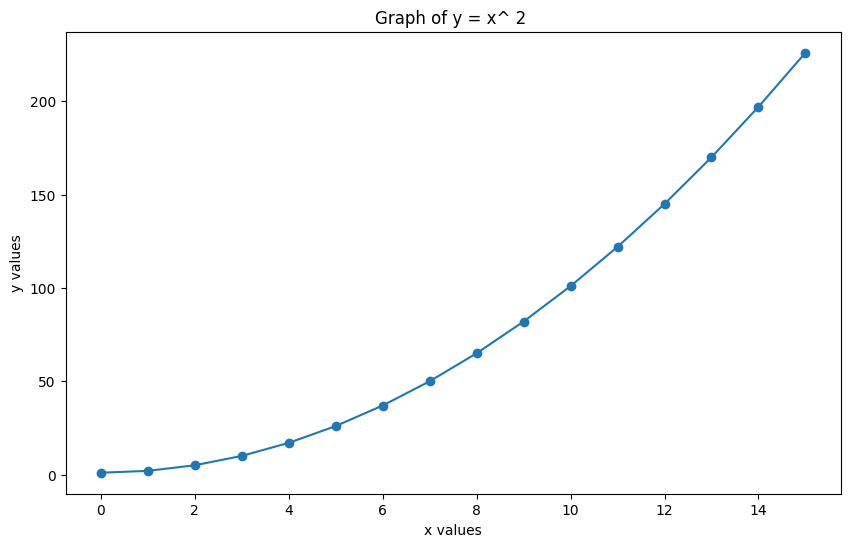

In [65]:
x=sorted([entry['x'] for entry in result_2.values()])
y=sorted([entry['y'] for entry in result_2.values()])
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(x,y,label='y = x^2 ',marker='o')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_title('Graph of y = x^ 2 ')
plt.show()
